In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
trips = pd.read_csv('data/trips.csv')
trips

,activityid,personid,modechoice
0,1,3,WALK
1,2,3,WALK
2,3,3,WALK
3,4,3,WALK
4,5,3,WALK
...,...,...,...
14047024,17147588,4113994,DRIVE_ALONE_FREE
14047025,17147589,4113994,DRIVE_ALONE_FREE
14047026,17147590,4113994,DRIVE_ALONE_FREE
14047027,17147592,4113995,SHARED_3_HOV


In [9]:
utility = pd.read_csv('data/utilityvars.csv')
utility

,activityid,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,...,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode
0,12150818,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,...,0.0,46.447229,46.447229,46.447229,0,5,True,False,False,1
1,3018709,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,...,0.0,495.225231,495.225231,495.225231,0,1,False,False,False,1
2,8809200,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,...,0.0,462.137117,462.137117,462.137117,0,1,False,False,True,1
3,11332534,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,...,0.0,342.291418,342.291418,342.291418,0,1,False,False,False,1
4,6130767,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,...,0.0,310.186071,310.186071,310.186071,0,1,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,10138525,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,...,0.0,842.672156,842.672156,842.672156,5,5,False,False,False,5
14047025,16270294,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,...,0.0,13.350623,13.350623,13.350623,5,3,False,False,False,3
14047026,16270295,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,...,0.0,137.377041,137.377041,137.377041,5,3,False,False,False,3
14047027,10138526,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,...,0.0,5.447711,5.447711,5.447711,5,5,False,False,False,3


## Exploratory Data Analysis

In [4]:
trips.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [5]:
utility.dtypes.unique()

array([dtype('int64'), dtype('bool'), dtype('float64')], dtype=object)

In [7]:
# check for problem features and missing data
for col in list(trips):
    print(col,':',trips[col].unique())

activityid : [       1        2        3 ... 17147590 17147592 17147593]
personid : [      3       4       5 ... 4113993 4113994 4113995]
modechoice : ['WALK' 'SHARED_2_HOV' 'DRIVE_ALONE_FREE' 'SCH_BUS' 'SHARED_3_HOV'
 'WALK_SET' 'BIKE' 'KNR_SET' 'PNR_SET' 'DRIVE_ALONE_PAY' 'SHARED_2_PAY'
 'SHARED_3_PAY']


In [8]:
# check for problem features and missing data
for col in list(utility):
    print(col,':',utility[col].unique())

activityid : [12150818  3018709  8809200 ... 16270295 10138526 10138527]
age : [4 6 7 2 3 1 0]
gender : [ True False]
autosuf : [2 1 0]
numhouseholdpersons : [ 2  6  1  3  4  5  7  8  9 10]
income : [4 1 3 2 5]
oduden : [ 9.63319969  8.3046999  10.18949986 ... 62.67900085 58.9233017
 31.80550003]
oempden : [  11.59405804   70.11791229   47.53874588 ...  658.33776855  254.5579834
 1974.05187988]
ototint : [ 4. 12.  3.  1.  2.  6. 13. 11. 10. 25. 23. 14.  9. 24. 22. 26. 15.  8.
 27.  5. 16.  7. 18. 20. 17. 21. 19.]
dempden : [  67.65913391   32.27333832   13.56715679 ...  254.5579834     6.26534557
 1974.05187988]
sovdrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
hovdrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
tolldrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
tollcostsov : [  0.         160.26133728 201.02601624 ... 193.25448608 171.62652588
 214.60983276

## Data Cleaning

In [10]:
# drop columns with no significant values (e.g. only 1 value, only unique values)
utility = utility.drop(columns=['activityid'])
utility

,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,sovdrivetime,...,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode
0,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,5.053318,...,0.0,46.447229,46.447229,46.447229,0,5,True,False,False,1
1,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,31.226185,...,0.0,495.225231,495.225231,495.225231,0,1,False,False,False,1
2,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,30.145569,...,0.0,462.137117,462.137117,462.137117,0,1,False,False,True,1
3,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,24.318232,...,0.0,342.291418,342.291418,342.291418,0,1,False,False,False,1
4,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,25.267041,...,0.0,310.186071,310.186071,310.186071,0,1,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,56.546418,...,0.0,842.672156,842.672156,842.672156,5,5,False,False,False,5
14047025,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,1.403090,...,0.0,13.350623,13.350623,13.350623,5,3,False,False,False,3
14047026,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,12.287907,...,0.0,137.377041,137.377041,137.377041,5,3,False,False,False,3
14047027,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,1.173692,...,0.0,5.447711,5.447711,5.447711,5,5,False,False,False,3


In [11]:
# define categorical variables
utility['gender'] = np.where(utility['gender'] == True, 'female', 'male')

utility['autosuf'] = np.where(utility['autosuf'] == 0, 'no_vehicles', 
                                np.where(utility['autosuf'] == 1, 'insufficient', 'sufficient'))

utility['tourpurpose'] = np.where(utility['tourpurpose'] == 0, 'work', \
                                    np.where(utility['tourpurpose'] == 1, 'university', \
                                    np.where(utility['tourpurpose'] == 2, 'school', \
                                    np.where(utility['tourpurpose'] == 3, 'maintenance', \
                                    np.where(utility['tourpurpose'] == 4, 'escort', \
                                    np.where(utility['tourpurpose'] == 5, 'discretionary', \
                                    np.where(utility['tourpurpose'] == 6, 'work-based', 'cross-border')))))))
                                    
    
utility['tourmode'] = np.where(utility['tourmode'] == 1, 'drive_alone_free', \
                                np.where(utility['tourmode'] == 3, 'hov2',\
                                np.where(utility['tourmode'] == 5, 'hov3',\
                                np.where(utility['tourmode'] == 7, 'walk',\
                                np.where(utility['tourmode'] == 8, 'bike',\
                                np.where(utility['tourmode'] == 9, 'walk_to_transit',\
                                np.where(utility['tourmode'] == 10, 'park_ride',\
                                np.where(utility['tourmode'] == 11, 'kiss_ride','school_bus'))))))))

# utility['targettripmode'] = np.where(utility['targettripmode'] == 1, 'drive_alone_free', \
#                                 np.where(utility['targettripmode'] == 2, 'drive_alone_pay',\
#                                 np.where(utility['targettripmode'] == 3, 'hov2_free',\
#                                 np.where(utility['targettripmode'] == 4, 'hov2_pay',\
#                                 np.where(utility['targettripmode'] == 5, 'hov3_free',\
#                                 np.where(utility['targettripmode'] == 6, 'hov3_pay',\
#                                 np.where(utility['targettripmode'] == 7, 'walk',\
#                                 np.where(utility['targettripmode'] == 8, 'bike',\
#                                 np.where(utility['targettripmode'] == 9, 'walk_to_transit',\
#                                 np.where(utility['targettripmode'] == 10, 'park_ride',\
#                                 np.where(utility['targettripmode'] == 11, 'kiss_ride','school_bus')))))))))))

In [8]:
utility.dtypes

age                        int64
gender                    object
autosuf                   object
numhouseholdpersons        int64
income                     int64
oduden                   float64
oempden                  float64
ototint                  float64
dempden                  float64
sovdrivetime             float64
hovdrivetime             float64
tolldrivetime            float64
tollcostsov              float64
tollcosthov2             float64
tollcosthov3             float64
walkttime                float64
walktotransitutility     float64
drivetotransitutility    float64
parkingcost              float64
parkingwalktime          float64
sovcost                  float64
hovcost                  float64
tollcost                 float64
tourpurpose               object
tourmode                  object
firststop                   bool
laststop                    bool
zerototalstops              bool
targettripmode             int64
dtype: object

In [7]:
for col in list(utility):
    print(col,':',utility[col].value_counts())

age : 7    3754099
4    3165495
6    2818493
3    1743774
1     994808
0     955376
2     614984
Name: age, dtype: int64
gender : female    7630493
male      6416536
Name: gender, dtype: int64
autosuf : insufficient    7330371
sufficient      6556605
no_vehicles      160053
Name: autosuf, dtype: int64
numhouseholdpersons : 2     3478939
4     2840701
3     2466820
5     1917514
1     1273335
6     1135600
8      569690
9      262962
7       90472
10      10996
Name: numhouseholdpersons, dtype: int64
income : 3    3182876
2    3170265
1    2701888
5    2643779
4    2348221
Name: income, dtype: int64
oduden : 5.558900     81383
10.986600    48101
3.956300     44700
7.538500     42778
2.540700     29732
             ...  
40.804199        1
35.840401        1
15.664600        1
0.013700         1
49.155701        1
Name: oduden, Length: 20621, dtype: int64
oempden : 10.919112       81383
43.163792       48101
23979.982422    44700
35.341751       42619
144.660065      29732
              

In [ ]:
# visualize distribution of each variable
# currently takes too long
num_vars = [col for col in list(utility) if utility[col].dtype in ['int64', 'float64']]
for col in num_vars:
    utility[col].plot.hist(bins=len(utility[col].unique()), alpha=0.5)

In [12]:
# define response, categorical, and numerical variables 
Y = utility['targettripmode'] - 1

X1 = utility.select_dtypes(include=['object','bool'])
X2 = utility.select_dtypes(exclude=['object','bool']).drop(columns='targettripmode')
Y

0           0
1           0
2           0
3           0
4           0
           ..
14047024    4
14047025    2
14047026    2
14047027    2
14047028    4
Name: targettripmode, Length: 14047029, dtype: int64

In [13]:
# show table with expanded categorical columns
expanded_data = []

for col in X1.columns:
    dummies = pd.get_dummies(X1[col], prefix=col)
    expanded_data.append(dummies)

expanded_data = pd.concat(expanded_data, axis=1)
expanded_data

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,tourmode_park_ride,tourmode_school_bus,tourmode_walk,tourmode_walk_to_transit,firststop_False,firststop_True,laststop_False,laststop_True,zerototalstops_False,zerototalstops_True
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
14047025,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
14047026,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
14047027,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [14]:
# all variables with expanded categorical variables
data_encoded = pd.concat([expanded_data, X2, Y], axis=1)
data_encoded

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,targettripmode
0,1,0,0,0,1,0,0,0,0,0,...,0.0,10.677524,-999.0,-999.0,0.0,0.0,46.447229,46.447229,46.447229,0
1,0,1,0,0,1,0,0,0,0,0,...,0.0,113.844883,-999.0,-999.0,0.0,0.0,495.225231,495.225231,495.225231,0
2,0,1,0,0,1,0,0,0,0,0,...,0.0,106.238420,-999.0,-999.0,0.0,0.0,462.137117,462.137117,462.137117,0
3,0,1,0,0,1,0,0,0,0,0,...,0.0,78.687684,-999.0,-999.0,0.0,0.0,342.291418,342.291418,342.291418,0
4,0,1,0,0,1,0,0,0,0,0,...,0.0,71.307144,-999.0,-999.0,0.0,0.0,310.186071,310.186071,310.186071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,1,0,0,0,1,0,1,0,0,0,...,0.0,193.717741,-999.0,-999.0,0.0,0.0,842.672156,842.672156,842.672156,4
14047025,0,1,0,0,1,0,1,0,0,0,...,0.0,3.069109,-999.0,-999.0,0.0,0.0,13.350623,13.350623,13.350623,2
14047026,0,1,0,0,1,0,1,0,0,0,...,0.0,31.580930,-999.0,-999.0,0.0,0.0,137.377041,137.377041,137.377041,2
14047027,1,0,0,0,1,0,1,0,0,0,...,0.0,1.252347,-999.0,-999.0,0.0,0.0,5.447711,5.447711,5.447711,2


In [15]:
# # use weights on tourmode, which will weight more on walk time - could show how much more inconvenient it is to walk/not
# subset = data_encoded.sample(n=10000, weights='walkttime', random_state=1)
# subset

In [16]:
mode1 = data_encoded[data_encoded['targettripmode']==0].sample(n=1000, weights='walkttime', random_state=1)
mode2 = data_encoded[data_encoded['targettripmode']==1].sample(n=1000, weights='walkttime', random_state=1)
mode3 = data_encoded[data_encoded['targettripmode']==2].sample(n=1000, weights='walkttime', random_state=1)
mode4 = data_encoded[data_encoded['targettripmode']==3].sample(n=1000, weights='walkttime', random_state=1)
mode5 = data_encoded[data_encoded['targettripmode']==4].sample(n=1000, weights='walkttime', random_state=1)
mode6 = data_encoded[data_encoded['targettripmode']==5].sample(n=1000, weights='walkttime', random_state=1)
mode7 = data_encoded[data_encoded['targettripmode']==6].sample(n=1000, weights='walkttime', random_state=1)
mode8 = data_encoded[data_encoded['targettripmode']==7].sample(n=1000, weights='walkttime', random_state=1)
mode9 = data_encoded[data_encoded['targettripmode']==8].sample(n=1000, weights='walkttime', random_state=1)
mode10 = data_encoded[data_encoded['targettripmode']==9].sample(n=1000, weights='walkttime', random_state=1)
mode11 = data_encoded[data_encoded['targettripmode']==10].sample(n=1000, weights='walkttime', random_state=1)
mode12 = data_encoded[data_encoded['targettripmode']==11].sample(n=1000, weights='walkttime', random_state=1)

In [17]:
combined_subsamples = pd.concat([mode1,mode2,mode3,mode4,mode5,mode6,mode7,mode8,mode9,mode10,mode11,mode12], axis=0)

combined_subsamples

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,targettripmode
5420299,1,0,0,0,1,0,0,1,0,0,...,0.0,74.541791,-999.0,-999.0,0.0,0.0,324.256782,324.256782,324.256782,0
10137151,0,1,0,0,1,0,0,0,0,0,...,0.0,68.671031,-999.0,-999.0,0.0,0.0,298.718978,298.718978,298.718978,0
459,0,1,1,0,0,0,0,0,0,0,...,0.0,125.903913,-999.0,-999.0,0.0,0.0,547.682008,547.825087,547.682008,0
3523186,0,1,1,0,0,0,0,0,1,0,...,0.0,30.619256,-999.0,-999.0,0.0,0.0,133.193759,133.193759,133.193759,0
1389833,0,1,0,0,1,0,0,1,0,0,...,0.0,51.645009,-999.0,-999.0,0.0,0.0,224.655784,224.655784,224.655784,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649022,0,1,0,0,1,0,0,0,0,1,...,0.0,12.468397,-999.0,-999.0,0.0,0.0,54.237525,54.237525,54.237525,11
1014748,1,0,1,0,0,0,0,0,0,1,...,0.0,5.529111,-999.0,-999.0,0.0,0.0,24.051633,24.051633,24.051633,11
409363,0,1,0,0,1,0,0,0,0,1,...,0.0,69.843901,-999.0,-999.0,0.0,0.0,303.820963,303.820963,303.820963,11
1561740,1,0,1,0,0,0,0,0,0,1,...,0.0,34.377707,-999.0,-999.0,0.0,0.0,149.543022,149.543022,149.543022,11


In [18]:
# rearrange into data array for training
data_array = combined_subsamples.values

X = data_array[:, 0:(data_array.shape[1]-1)]
Y = data_array[:,(data_array.shape[1]-1)]
print(X)
print(Y)

[[  1.           0.           0.         ... 324.25678242 324.25678242
  324.25678242]
 [  0.           1.           0.         ... 298.71897826 298.71897826
  298.71897826]
 [  0.           1.           1.         ... 547.68200756 547.82508718
  547.68200756]
 ...
 [  0.           1.           0.         ... 303.82096291 303.82096291
  303.82096291]
 [  1.           0.           1.         ... 149.54302231 149.54302231
  149.54302231]
 [  0.           1.           1.         ... 123.22225932 123.22225932
  123.22225932]]
[ 0.  0.  0. ... 11. 11. 11.]


## Model Building

In [19]:
# split into train and test sets 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9600, 49)
(2400, 49)
(9600,)
(2400,)


In [21]:
# build xgboost classifier for multiclassification
xgb_model = XGBClassifier(objective='multi:softprob',eval_metric='auc',num_class=12,use_label_encoder=False)
xgb_model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_class=12, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, ...)

## Evaluation

In [22]:
xgb_model.evals_result()

{'validation_0': OrderedDict([('auc',
               [0.991785,
                0.993834,
                0.994766,
                0.995469,
                0.995808,
                0.996139,
                0.996463,
                0.9967,
                0.996958,
                0.99718,
                0.99738,
                0.997564,
                0.997752,
                0.997949,
                0.998073,
                0.998184,
                0.998386,
                0.998563,
                0.998701,
                0.998793,
                0.998883,
                0.998947,
                0.999054,
                0.999172,
                0.99925,
                0.999308,
                0.999364,
                0.99942,
                0.999488,
                0.999536,
                0.999578,
                0.99962,
                0.999664,
                0.999703,
                0.999733,
                0.999758,
                0.99978,
        

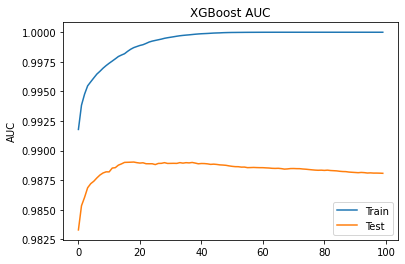

In [23]:
# plot training and teating accuracies 

import matplotlib.pyplot as plt
results = xgb_model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis,results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

In [24]:
y_pred = xgb_model.predict(X_test) 
y_pred = [round(value) for value in y_pred]

In [33]:
y_test[:20]

array([1., 6., 1., 9., 0., 9., 5., 8., 2., 4., 3., 1., 0., 1., 5., 8., 0.,
       7., 2., 1.])

In [32]:
y_pred[:20]

[1, 4, 3, 9, 0, 9, 5, 8, 2, 4, 5, 1, 0, 1, 5, 8, 0, 7, 2, 1]

In [43]:
unique = dict(zip(predictions,[predictions.count(i) for i in predictions]))
print("Dictionary : ",unique)

Dictionary :  {1: 187, 4: 226, 3: 207, 9: 186, 0: 184, 5: 226, 8: 198, 2: 197, 7: 195, 10: 229, 6: 176, 11: 189}


In [44]:
# Evaluation of the model
metrics.multilabel_confusion_matrix(y_test, y_pred)

array([[[2174,   25],
        [  42,  159]],

       [[2177,   22],
        [  36,  165]],

       [[2140,   50],
        [  63,  147]],

       [[2139,   45],
        [  54,  162]],

       [[2137,   63],
        [  37,  163]],

       [[2151,   41],
        [  23,  185]],

       [[2198,   16],
        [  26,  160]],

       [[2205,    0],
        [   0,  195]],

       [[2197,   16],
        [   5,  182]],

       [[2214,    1],
        [   0,  185]],

       [[2171,    7],
        [   0,  222]],

       [[2211,    0],
        [   0,  189]]])

In [45]:
# accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8808333333333334

In [46]:
# sensitivity
sensitivity = metrics.recall_score(y_test, y_pred, average = 'macro')
sensitivity

0.8833200384399618

In [47]:
# precision
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
precision

0.8839538977057595

In [48]:
# F1-score
f1 = (2 * precision * sensitivity) / (precision + sensitivity)
f1

0.8836368544013011

In [53]:
# n_classes = 12
# for i in range(n_classes):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()

In [62]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'drive_alone_free', 
                                        1: 'drive_alone_pay', 
                                        2: 'hov2_free',
                                        3: 'hov2_pay',
                                        4: 'hov3_free',
                                        5: 'hov3_pay',
                                        6: 'walk',
                                        7: 'bike',
                                        8: 'walk_to_transit',
                                        9: 'park_ride',
                                        10: 'kiss_ride',
                                        11: 'school_bus'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

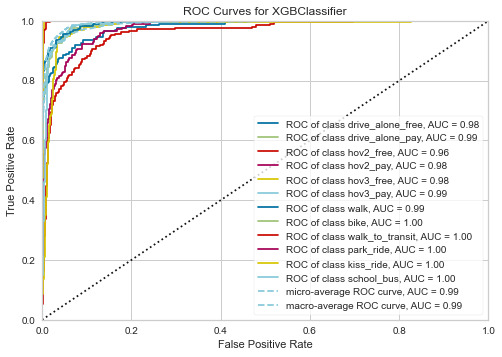

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None,
       encoder={0: 'drive_alone_free', 1: 'drive_alone_pay', 2: 'hov2_free',
                3: 'hov2_pay', 4: 'hov3_free', 5: 'hov3_pay', 6: 'walk',
                7: 'bike', 8: 'walk_to_transit', 9: 'park_ride',
                10: 'kiss_ride', 11: 'school_bus'},
       estimator=XGBClassifier(base...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_class=12, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
     

In [63]:
plot_ROC_curve(xgb_model, X_train, y_train, X_test, y_test)